# DataFrame(데이터프레임)

## DataFrame 개요
- 표(테이블-행렬)를 다루는 Pandas 클래스
    - 데이터베이스의 Table이나 R의 data.frame이나 Excel의 표와 동일한 역할
- 분석할 데이터를 가지는 판다스의 가장 핵심적인 클래스
- 행이름: index 열이름: column
    - 행이름과 열이름은 명시적으로 지정할 수 있다.
    - 명시적으로 지정하지 않으면 순번 (0부터 1씩 증가) 이 index, column 명으로 사용된다.
    - 하나의 행과 하나의 열은 Series로 구성된다.
- 직접 데이터를 넣어 생성하거나 데이터 셋을 파일(csv, 엑셀, DB 등)로 부터 읽어와 생성한다.

## DataFrame 생성
###  직접 생성
- `pd.DataFrame(data [, index=None, columns=None])`
- data 
    - DataFrame을 구성할 값을 설정
        - Series, List, ndarray를 담은 2차원 배열
        - 열이름을 key로 컬럼의 값 value로 하는 딕션어리(사전)
    - index
        - index명으로 사용할 값 배열로 설정
    - columns
        - 컬럼명으로 사용할 값 배열로 설정

In [3]:
import pandas as pd

In [4]:
# dictionary 를 이용해 DataFrame 생성
# 컬럼명:[컬럼값들, ...]  (원소들의 개수는 같아야한다.)
d = {
    'id':['id-1', 'id-2', 'id-3', 'id-4', 'id-5'],
    'korean':[100, 50, 70, 90, 85],
    'math':[80, 50, 90, 100, 100]
}
grade = pd.DataFrame(d)
grade

,id,korean,math
0,id-1,100,80
1,id-2,50,50
2,id-3,70,90
3,id-4,90,100
4,id-5,85,100


In [8]:
# 2차원 형태의 리스트(배열)을 이용해 생성
lst = [
    ['my-1', 20, 50],
    ['my-2', 70, 20],
    ['my-3', 100, 90],
    ['my-4', 70, 100],
    ['my-5', 60, 80],
    ['my-6', 100, 100]
]
grade2 = pd.DataFrame(lst, columns=['ID', '국어', '수학']) #, index=list('가나다라마바'))
grade2

,ID,국어,수학
0,my-1,20,50
1,my-2,70,20
2,my-3,100,90
3,my-4,70,100
4,my-5,60,80
5,my-6,100,100


### DataFrame 파일로 저장

- ### DataFrame객체.to_파일타입()
- DataFrame객체.to_csv(파일경로,sep=',', index=True, header=True, encoding)
    - 텍스트 파일로 저장
    - 파일경로: 저장할 파일경로(경로/파일명)
    - sep : 데이터 구분자
    - index, header: 인덱스/헤더 저장 여부
    - encoding
        - 파일인코딩
        - <del>생략시 운영체제 기본 encoding 방식</del>
        - 생략시 UTF-8 로 저장
    
- DataFrame객체.to_excel(파일경로, index=True, header=True)
    - 엑셀파일로 저장

In [14]:
# csv 파일로 저장
import os
save_dir = 'save_data'  # DataFrame의 데이터를 저장할 디렉토리 생성
if not os.path.isdir(save_dir):  #디렉토리가 없으면
    os.mkdir(save_dir) # save_data라는 디렉토리를 생성.

In [16]:
save_file_path = save_dir+"/grade1.csv"
print(save_file_path)

save_data/grade1.csv


In [18]:
os.path.join(save_dir, 'src', 'data', 'a.csv')

'save_data\\src\\data\\a.csv'

In [17]:
save_file_path = os.path.join(save_dir, 'grade1.csv')
save_file_path

'save_data\\grade1.csv'

In [21]:
grade.to_csv(save_file_path, 
             index=False   #index명은 저장하지 않겠다. (1씩 증가하는 정수를 index명으로 사용한 경우 저장하지 않는다.)
            )

In [22]:
save_file_path2 = os.path.join(save_dir, 'grade2.csv')
grade.to_csv(save_file_path2, index=False, 
             header=False) # 컬럼명을 저장하지 않겠다.

In [25]:
save_file_path3 = os.path.join(save_dir, 'grade3.csv')
grade.to_csv(save_file_path3, index=False,
             sep='|') # 열(값) 구분자를 설정 (default: `,` => 탭)

In [20]:
grade

,id,korean,math
0,id-1,100,80
1,id-2,50,50
2,id-3,70,90
3,id-4,90,100
4,id-5,85,100


In [27]:
# excel 저장을 위해 다음 모듈 설치
!pip install xlwt

In [28]:
# 다른 파일형식 저장
## excel
save_file_path4 = os.path.join(save_dir, 'grade.xls')
grade.to_excel(save_file_path4, index=False)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10668\503894916.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  grade.to_excel(save_file_path4, index=False)


In [29]:
# pickle
save_file_path5 = os.path.join(save_dir, 'grade.pkl')
grade.to_pickle(save_file_path5)

In [30]:
# html
save_file_path6 = os.path.join(save_dir, 'grade.html')
grade.to_html(save_file_path6)

### 파일로 부터 데이터셋을 읽어와 생성하기
### csv 파일 등 텍스트 파일로 부터 읽어와 생성
- `pd.read_csv(파일경로, sep=',', header, index_col, na_values, encoding)`
    - 파일경로 : 읽어올 파일의 경로
    - sep
        - 데이터 구분자. 
        - 기본값: 쉼표
    - header=정수
        - 열이름(컬럼이름)으로 사용할 행 지정
        - 기본값: 첫번째 행
        - None 설정: 첫번째 행부터 데이터로 사용하고 header(컬럼명)는 0부터 자동증가하는 값을 붙인다.
    - index_col=정수,컬럼명
        - index 명으로 사용할 열이름(문자열)이나 열의 순번(정수)을 지정.
        - 생략시 0부터 자동증가하는 값을 붙인다.
    - na_values
        - 읽어올 데이터셋의 값 중 결측치로 처리할 문자열 지정. 
    - encoding
        - 파일 인코딩
        - 생략시 운영체제 기본 encoding 방식

In [33]:
save_file_path

'save_data\\grade1.csv'

In [34]:
grade_df1 = pd.read_csv(save_file_path)
grade_df1

,id,korean,math
0,id-1,100,80
1,id-2,50,50
2,id-3,70,90
3,id-4,90,100
4,id-5,85,100


In [36]:
grade.to_csv('save_data/test_grade.csv')

In [37]:
pd.read_csv('save_data/test_grade.csv')

,Unnamed: 0,id,korean,math
0,0,id-1,100,80
1,1,id-2,50,50
2,2,id-3,70,90
3,3,id-4,90,100
4,4,id-5,85,100


In [44]:
# header설정을 하지 않으면 첫번째 행을 컬럼명으로 읽는다.
grade_df2 = pd.read_csv(save_file_path2, 
                        header=None,   # header 행이 없다 설정
                        names=['ID', 'Korean', 'Math']) # header=None 으로 하면 순번(0,1,2,..)이 컬럼명이 된다. names=[컬럼명]
grade_df2

,ID,Korean,Math
0,id-1,100,80
1,id-2,50,50
2,id-3,70,90
3,id-4,90,100
4,id-5,85,100


In [47]:
grade_df3 = pd.read_csv(save_file_path3, sep='|')
grade_df3

,id,korean,math
0,id-1,100,80
1,id-2,50,50
2,id-3,70,90
3,id-4,90,100
4,id-5,85,100


In [48]:
grade_df4 = pd.read_csv(save_file_path)
grade_df4

,id,korean,math
0,id-1,100.0,80
1,id-2,NaN,50
2,id-3,70.0,90
3,id-4,90.0,100
4,id-5,85.0,100


In [50]:
grade_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5 non-null      object 
 1   korean  4 non-null      float64
 2   math    5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [52]:
grade_df5 = pd.read_csv(save_file_path2, header=None,
                       na_values=['결측치'])
# 문자열 "결측치" 는 값이 아니라 NA로 읽어들여라.
grade_df5

,0,1,2
0,id-1,100.0,80
1,id-2,50.0,50
2,id-3,NaN,90
3,id-4,90.0,100
4,id-5,85.0,100


In [53]:
grade_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5 non-null      object 
 1   1       4 non-null      float64
 2   2       5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [54]:
pd.read_csv?

In [ ]:
# na_values : scalar, str, list-like, or dict, optional
#     Additional strings to recognize as NA/NaN. If dict passed, specific
#     per-column NA values.  By default the following values are interpreted as
#     NaN: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
#     '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a',
#     'nan', 'null'.

### 엑셀파일 읽기

In [56]:
!pip install xlrd
# 엑셀 읽기 위해 install

In [57]:
grade_df6 = pd.read_excel('save_data/grade.xls')
grade_df6

,id,korean,math
0,id-1,100,80
1,id-2,50,50
2,id-3,70,90
3,id-4,90,100
4,id-5,85,100


In [59]:
pd.read_csv?

### TODO 파일로 저장

In [58]:
!pip install openpyxl

xls 확장자 - 읽기(xlrd), 쓰기 (xlwd)    
xlxs 확장자 - openpyxl  

In [17]:
import pandas as pd
#1. data/movie.csv 를 읽어서 데이터프레임 생성

movie_df = pd.read_csv('data/movie.csv')
movie_df.shape

(4916, 28)

In [18]:
#1의 데이터프레임을 csv 파일로 저장(파일명 : movie_df1.csv)
movie_df.to_csv('movie_df1.csv', index=False)  #index명이 자동증가 순번일 경우 저장하지 않는다.

In [19]:
#1의 데이터프레임을 엑셀파일로 저장(파일명 : movie_df1.xlsx)
movie_df.to_excel('movie_df1.xlsx', index=False)

## 주요 메소드, 속성 

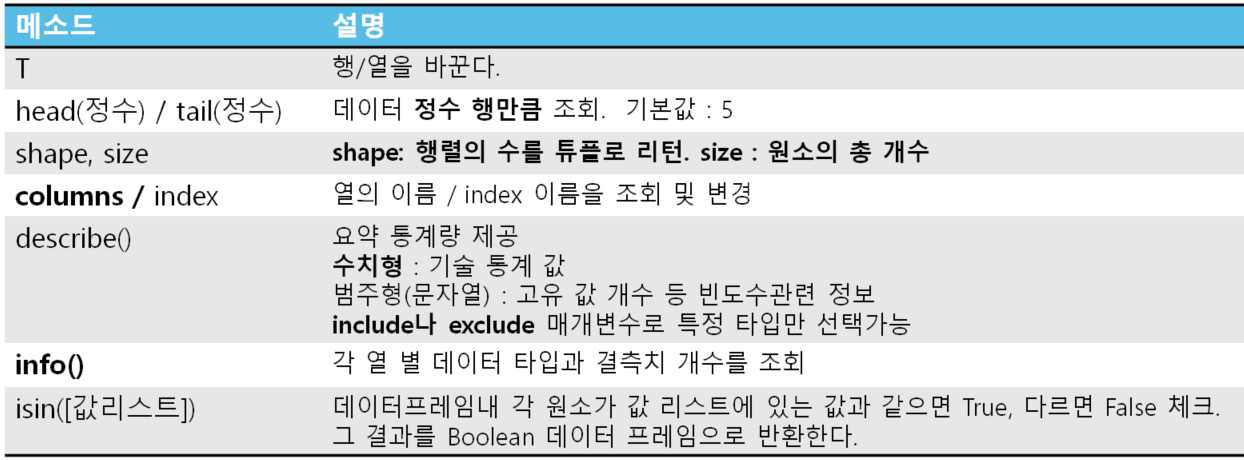

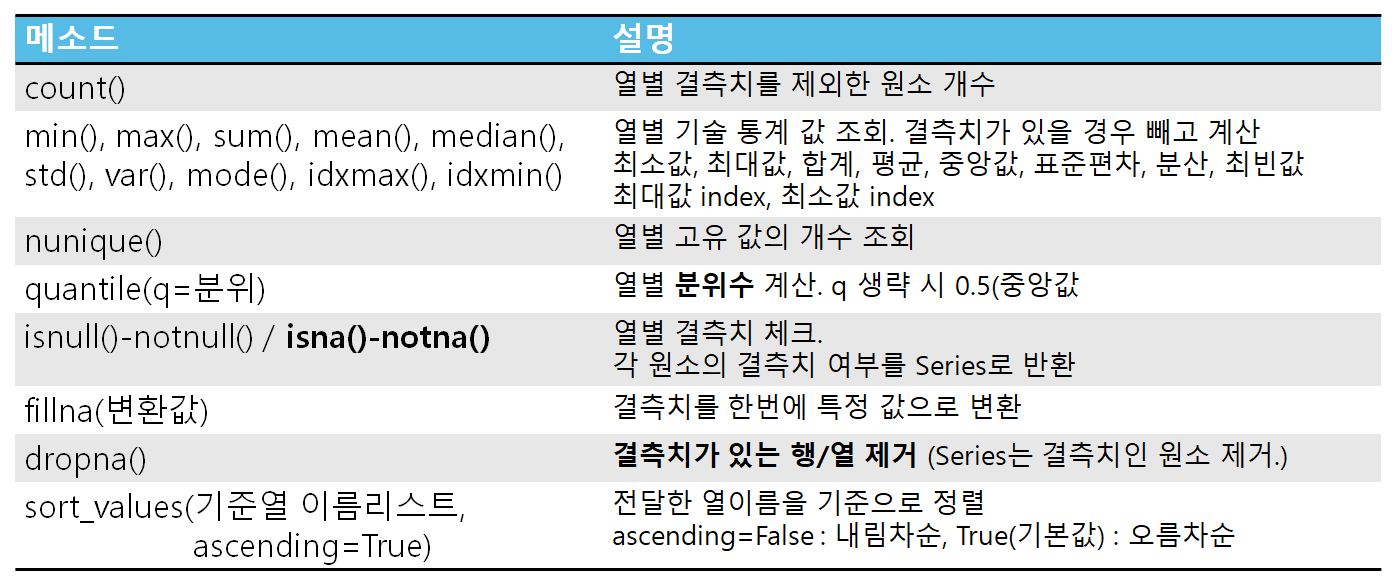

In [15]:
grade = pd.read_csv('save_data/grade1.csv')
grade

,id,korean,math
0,id-1,100.0,80
1,id-2,NaN,50
2,id-3,70.0,90
3,id-4,90.0,100
4,id-5,85.0,100


In [16]:
grade.T

,0,1,2,3,4
id,id-1,id-2,id-3,id-4,id-5
korean,100.0,NaN,70.0,90.0,85.0
math,80,50,90,100,100


In [22]:
# movie_df.head() 
movie_df.head(7)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [25]:
movie_df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
4915,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [27]:
movie_df.tail(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
4915,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [28]:
movie_df.shape  # axis(순번의 방향) 별 데이터수 (행수, 열수)

(4916, 28)

In [29]:
grade.shape  # 5 x 3

(5, 3)

In [31]:
movie_df.size, 4916*28

(137648, 137648)

In [32]:
grade.size

15

In [33]:
grade.info() # DataFrame의 (행, 열에 대한) 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5 non-null      object 
 1   korean  4 non-null      float64
 2   math    5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4            =====> 행 정보. RangeIndex: Index명 정보, 5 entries (행수), 0 to 4 (index명)
Data columns (total 3 columns):          =====> 컬럼 정보
 #   Column(이름)  Non-Null Count(컬럼별원소수)  Dtype(데이터타입)  =====> Non-Null Count: 결측치 확인
---  ------       --------------                -----  
 0   id           5 non-null                    object (문자열)
 1   korean       4 non-null                    float64
 2   math         5 non-null                    int64  
dtypes: float64(1), int64(1), object(1)  =====> 각 타입별 컬럼개수: 타입(컬럼개수)
memory usage: 248.0+ bytes               =====> 메모리 사용량
```

In [34]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [38]:
grade

,id,korean,math
0,id-1,100.0,80
1,id-2,NaN,50
2,id-3,70.0,90
3,id-4,90.0,100
4,id-5,85.0,100


In [37]:
# 기술통계량 메소드
# DF.max() => 컬럼별 기술통계량값을 반환.
grade.max()

id         id-5
korean    100.0
math        100
dtype: object

In [39]:
grade.max()['korean']

100.0

In [40]:
grade.sum()

id        id-1id-2id-3id-4id-5
korean                   345.0
math                       420
dtype: object

In [42]:
import warnings
warnings.filterwarnings(action='ignore')

In [43]:
grade.mean()

korean    86.25
math      84.00
dtype: float64

In [44]:
# 수치형(int, float) 타입 컬럼 의 요약통계량을 반환 - 기본값
grade.describe()

,korean,math
count,4.00,5.000000
mean,86.25,84.000000
std,12.50,20.736441
min,70.00,50.000000
25%,81.25,80.000000
50%,87.50,90.000000
75%,92.50,100.000000
max,100.00,100.000000


In [45]:
grade.describe(include=['object'])  # 컬럼의 타입을 지정하면 그 타입의 컬럼에대한 요약 통계량을 반환.

,id
count,5
unique,5
top,id-1
freq,1


In [47]:
grade.describe(exclude=['float64', 'int64']) #지정한 타입의 컬럼을 제외하고 요약 통계량을 반환.

,id
count,5
unique,5
top,id-1
freq,1


In [49]:
movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4867.0,1.379889e+02,1.202394e+02,1.00,49.00,108.00,191.00,8.130000e+02
duration,4901.0,1.070908e+02,2.528602e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4814.0,6.910145e+02,2.832954e+03,0.00,7.00,48.00,189.75,2.300000e+04
actor_3_facebook_likes,4893.0,6.312763e+02,1.625875e+03,0.00,132.00,366.00,633.00,2.300000e+04
actor_1_facebook_likes,4909.0,6.494488e+03,1.510699e+04,0.00,607.00,982.00,11000.00,6.400000e+05
gross,4054.0,4.764451e+07,6.737255e+07,162.00,5019656.25,25043962.00,61108412.75,7.605058e+08
num_voted_users,4916.0,8.264492e+04,1.383222e+05,5.00,8361.75,33132.50,93772.75,1.689764e+06
cast_total_facebook_likes,4916.0,9.579816e+03,1.816432e+04,0.00,1394.75,3049.00,13616.75,6.567300e+05
facenumber_in_poster,4903.0,1.377320e+00,2.023826e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,4895.0,2.676688e+02,3.729348e+02,1.00,64.00,153.00,320.50,5.060000e+03


## 데이터 프레임의 기본 정보 조회
- csv 파일 읽기
- shape
- info()
- head()
- tail()
- isnull().sum() => 컬럼별 null 체크 (sum() 한번더 하면 총개수)
- describe() : 숫자형-기술통계값, 문자열-총개수, 유니크값, 최빈값
- index / columns : index와, 컬럼명 조회

In [50]:
import pandas as pd

In [51]:
#  csv 데이터파일을 읽어서 DataFrame생성
df = pd.read_csv('data/movie.csv')

df.shape # 행/열 수 확인

(4916, 28)

In [52]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [53]:
df.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [54]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
4915,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [57]:
# 컬럼별 결측치 확인  => isnull(), isna()
df.isnull().sum()   # bool -> sum(): True-1, False-0
                    # DF.sum() -> 컬럼별

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4867.0,1.379889e+02,1.202394e+02,1.00,49.00,108.00,191.00,8.130000e+02
duration,4901.0,1.070908e+02,2.528602e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4814.0,6.910145e+02,2.832954e+03,0.00,7.00,48.00,189.75,2.300000e+04
actor_3_facebook_likes,4893.0,6.312763e+02,1.625875e+03,0.00,132.00,366.00,633.00,2.300000e+04
actor_1_facebook_likes,4909.0,6.494488e+03,1.510699e+04,0.00,607.00,982.00,11000.00,6.400000e+05
gross,4054.0,4.764451e+07,6.737255e+07,162.00,5019656.25,25043962.00,61108412.75,7.605058e+08
num_voted_users,4916.0,8.264492e+04,1.383222e+05,5.00,8361.75,33132.50,93772.75,1.689764e+06
cast_total_facebook_likes,4916.0,9.579816e+03,1.816432e+04,0.00,1394.75,3049.00,13616.75,6.567300e+05
facenumber_in_poster,4903.0,1.377320e+00,2.023826e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,4895.0,2.676688e+02,3.729348e+02,1.00,64.00,153.00,320.50,5.060000e+03


In [61]:
df.describe(include=['object']).T

,count,unique,top,freq
color,4897,2,Color,4693
director_name,4814,2397,Steven Spielberg,26
actor_2_name,4903,3030,Morgan Freeman,18
genres,4916,914,Drama,233
actor_1_name,4909,2095,Robert De Niro,48
movie_title,4916,4916,Avatar,1
actor_3_name,4893,3519,Steve Coogan,8
plot_keywords,4764,4756,based on novel,4
movie_imdb_link,4916,4916,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,1
language,4904,47,English,4582


In [62]:
# 컬럼명을 조회
columns = df.columns
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [63]:
df2 = df.copy() # DataFrame을 복제
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [67]:
#movie_facebook_likes를 int64 => int32 (값하나를 64bit -> 32bit)  
df2['movie_facebook_likes'] = df2['movie_facebook_likes'].astype('int32')

In [70]:
df2['cast_total_facebook_likes'] = df2['cast_total_facebook_likes'].astype('int32')

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int32

## 컬럼이름/행이름 조회 및 변경
### 컬럼이름/행이름 조회
- DataFrame객체.columns
    - 컬럼명 조회
    - 컬럼명은 차후 조회를 위해 따로 변수에 저장하는 것이 좋다.
- DataFrame객체.index
    - 행명 조회

In [73]:
# 컬럼명 조회
df.columns  # 리스트(Index객체)에 컬럼명들을 담아서 반환

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [75]:
# 첫번째 컬럼명?
df.columns[0]  
df.columns[:5]

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes'],
      dtype='object')

In [76]:
# index명(행) 조회
df.index  
# index명을 설정한 경우: 리스트(Index)
# Index명을 설정하지 않은 경우(순번을 index로 사용한 경우): RangeIndex 

RangeIndex(start=0, stop=4916, step=1)

In [78]:
# df.index[20]

20

In [79]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### 컬럼이름/행이름 변경
- 컬럼과 인덱스는 불변의 성격을 가짐
- columns와 index 속성으로는 통째로 바꾸는 것은 가능하나 index로 하나씩 바꾸는 것은 안된다.
    - `df.columns = ['새이름','새이름', ... , '새이름']
    - `df.columns[1] = '새이름' # 이건 안된다. `

### 컬럼이름/행이름 변경 관련 메소드    
- `DataFrame객체.rename(index=행이름변경설정, columns=열이름변경설정, inplace=False)`
    - 개별 컬럼이름/행이름 변경 하는 메소드
    - 변경한 DataFrame을 반환
    - 변경설정: 딕셔너리 사용
        - {'기존이름':'새이름', ..}
        - inplace: 원본을 변경할지 여부(boolean)
- `DataFrame객체.set_index(컬럼이름, inplace=False)`
    - 특정 컬럼을 행의 index 명으로 사용
    - 열이 index명이 되면서 그 컬럼은 Data Set 에서 제거된다.
- `DataFrame객체.reset_index(inplace=False)`
    - index를 첫번째 컬럼으로 복원

In [85]:
grade = pd.read_csv('save_data/grade2.csv', header=None, na_values=['결측치'])
grade

,0,1,2
0,id-1,100.0,80
1,id-2,50.0,50
2,id-3,NaN,90
3,id-4,90.0,100
4,id-5,85.0,100


In [86]:
grade.columns

Int64Index([0, 1, 2], dtype='int64')

In [87]:
# 컬럼명 변경 - 전체변경
grade.columns = ['ID', 'Korean', 'Math']

In [89]:
grade.columns

Index(['ID', 'Korean', 'Math'], dtype='object')

In [92]:
# grade.columns[1] = '국어'

In [96]:
# 특정 컬럼의 이름을 변경 {현재이름:새이름}
grade.rename(columns={
    'Korean':'국어', 
    'Math':'수학'
}, inplace=True) #대상(원본)을 직접 변경.

In [97]:
grade

,ID,국어,수학
0,id-1,100.0,80
1,id-2,50.0,50
2,id-3,NaN,90
3,id-4,90.0,100
4,id-5,85.0,100


In [98]:
grade.rename(index={1:'일번'})  # index를 변경

,ID,국어,수학
0,id-1,100.0,80
일번,id-2,50.0,50
2,id-3,NaN,90
3,id-4,90.0,100
4,id-5,85.0,100


In [102]:
# 특정 컬럼을 index명으로 사용
grade.set_index('ID', inplace=True)
grade

,국어,수학
ID,,
id-1,100.0,80
id-2,50.0,50
id-3,NaN,90
id-4,90.0,100
id-5,85.0,100


In [105]:
# index명을 컬럼으로 추출
grade.reset_index()  #inplace=True : 원본 변경

,ID,국어,수학
0,id-1,100.0,80
1,id-2,50.0,50
2,id-3,NaN,90
3,id-4,90.0,100
4,id-5,85.0,100


In [109]:
grade

,국어,수학
ID,,
id-1,100.0,80
id-2,50.0,50
id-3,NaN,90
id-4,90.0,100
id-5,85.0,100


In [108]:
grade.reset_index(drop=True) # index명을 제거하고 순번으로 변경

,국어,수학
0,100.0,80
1,50.0,50
2,NaN,90
3,90.0,100
4,85.0,100


In [115]:
pd.read_csv('save_data/grade2.csv', header=None,
           names=['id', 'korean', 'math'],  # column명 지정
           index_col=0) # 특정 컬럼을 index로 사용.

,korean,math
id,,
id-1,100,80
id-2,50,50
id-3,결측치,90
id-4,90,100
id-5,85,100


## 행 / 열 삭제
- DataFrame객체.drop(columns, index, inplace=False)
    - columns : 삭제할 열이름 또는 열이름 리스트
    - index : 삭제할 index명 또는 index 리스트
    - inplace: 원본을 변경할지 여부(boolean)

In [120]:
# grade.drop(columns=['국어'])
grade.drop(columns=['국어', '수학'])

""
ID
id-1
id-2
id-3
id-4
id-5


In [123]:
# grade.drop(index=['id-2'])
grade.drop(index=['id-1', 'id-2', 'id-5'])

,국어,수학
ID,,
id-3,NaN,90
id-4,90.0,100


In [125]:
grade2 = grade.reset_index()
grade2

,ID,국어,수학
0,id-1,100.0,80
1,id-2,50.0,50
2,id-3,NaN,90
3,id-4,90.0,100
4,id-5,85.0,100


In [126]:
grade2.drop(index=[1, 3, 4])

,ID,국어,수학
0,id-1,100.0,80
2,id-3,NaN,90


In [ ]:
# drop(labels=['행/컬럼명', ..], axis='행/열번호')
# 행/열번호: 0-행, 1-열

In [131]:
grade.drop(labels=['국어'], axis=1)#열(컬럼)-column명

,수학
ID,
id-1,80
id-2,50
id-3,90
id-4,100
id-5,100


In [132]:
grade.drop(labels=['id-1', 'id-3'], axis=0)  #행-index명

,국어,수학
ID,,
id-2,50.0,50
id-4,90.0,100
id-5,85.0,100


In [133]:
grade.shape
# (5,2) = (행, 열) = (0, 1)

(5, 2)

## 열 추가
- 새로운 열을 지정 후 값을 대입하면 새로운 열을 추가할 수 있다.
    - 보통 파생변수를 만들 때 사용한다.
- df['새열명'] = 값
    - 마지막 열로 추가된다.
    - 하나의 값을 대입하면 모든 행에 그 값이 대입된다.
    - 다른 값을 주려면 배열에 담아서 대입한다.
- 기존 열들의 값을 이용한(계산/처리) 새로운 열 생성 => 파생변수
    - 벡터 연산을 이용하여 값 대입
    - df[‘새열이름‘] = 기존 열들을 이용한 연산

In [135]:
# 추가/변경
# 없는 컬럼명: 추가, 있는 컬럼명: 값을 변경
grade['영어'] = 0  #모든행에 동일한 값을 대입

In [137]:
grade['과학'] = [80,90,100,70,56]  #각행마다 다른 값을 대입. 행 개수만큼의 value를 리스트로 전달

In [139]:
grade['영어'] = 50
grade

,국어,수학,영어,과학
ID,,,,
id-1,100.0,80,50,80
id-2,50.0,50,50,90
id-3,NaN,90,50,100
id-4,90.0,100,50,70
id-5,85.0,100,50,56


In [149]:
# DF[컬럼명] => 특정 컬럼 값들을 조회 => Series로 반환(한개컬럼조회시) - series의 index명 으로 DF의 index명 온다.
grade['합계'] = grade['국어'] + grade['수학'] + grade['영어'] + grade['과학']
grade

,국어,수학,영어,과학,합계
ID,,,,,
id-1,100.0,80,50,80,310.0
id-2,50.0,50,50,90,240.0
id-3,NaN,90,50,100,NaN
id-4,90.0,100,50,70,310.0
id-5,85.0,100,50,56,291.0


In [151]:
grade['평균'] = grade['합계']/4
grade

,국어,수학,영어,과학,합계,평균
ID,,,,,,
id-1,100.0,80,50,80,310.0,77.50
id-2,50.0,50,50,90,240.0,60.00
id-3,NaN,90,50,100,NaN,NaN
id-4,90.0,100,50,70,310.0,77.50
id-5,85.0,100,50,56,291.0,72.75


## TODO
- 패스 여부를 boolean값으로 저장하는 컬럼을 추가
    - 컬럼명: pass
    - 기준: 평균점수가 80미만이면 False,이상이면 True가 나오도록 처리

In [154]:
grade['pass'] = grade['평균'] >= 75
grade

,국어,수학,영어,과학,합계,평균,pass
ID,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True
id-2,50.0,50,50,90,240.0,60.00,False
id-3,NaN,90,50,100,NaN,NaN,False
id-4,90.0,100,50,70,310.0,77.50,True
id-5,85.0,100,50,56,291.0,72.75,False


In [158]:
import numpy as np
# np.where(조건, 참, 거짓) # 조건이 True이면 참값, False 거짓값
grade['pass2'] = np.where(grade['평균']>=75, "합격", "불합격")
grade

,국어,수학,영어,과학,합계,평균,pass,pass2
ID,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격
id-2,50.0,50,50,90,240.0,60.00,False,불합격
id-3,NaN,90,50,100,NaN,NaN,False,불합격
id-4,90.0,100,50,70,310.0,77.50,True,합격
id-5,85.0,100,50,56,291.0,72.75,False,불합격


In [156]:
grade['평균']>=75

ID
id-1     True
id-2    False
id-3    False
id-4     True
id-5    False
Name: 평균, dtype: bool

# 행별, 열별 값 조회
## 열(컬럼) 조회
- **df['컬럼명']**
- **df.컬럼명**
- **팬시 indexing**
    - 여러개의 컬럼을 조회할 경우 컬럼명들을 담은 리스트/튜플로 조회
- 주의
    - df[컬럼index] 는 안된다.
    - df[0:3] 슬라이싱은 **행** 조회다.
    - **만약 indexing이나 slicing을 이용해 컬럼값 조회하려면 columns 속성을 이용한다.**
        - `df[df.columns[:3]]`

In [161]:
# 한 컬럼(열)을 조회할 경우 Series로 반환. index명=DF의 행index명
grade['평균']

ID
id-1    77.50
id-2    60.00
id-3      NaN
id-4    77.50
id-5    72.75
Name: 평균, dtype: float64

In [162]:
grade.평균

ID
id-1    77.50
id-2    60.00
id-3      NaN
id-4    77.50
id-5    72.75
Name: 평균, dtype: float64

In [164]:
grade.rename(columns={'합계':'점수 합계'}, inplace=True)
grade

,국어,수학,영어,과학,점수 합계,평균,pass,pass2
ID,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격
id-2,50.0,50,50,90,240.0,60.00,False,불합격
id-3,NaN,90,50,100,NaN,NaN,False,불합격
id-4,90.0,100,50,70,310.0,77.50,True,합격
id-5,85.0,100,50,56,291.0,72.75,False,불합격


In [165]:
grade['점수 합계']

ID
id-1    310.0
id-2    240.0
id-3      NaN
id-4    310.0
id-5    291.0
Name: 점수 합계, dtype: float64

In [167]:
# grade.점수 합계   # . 표기법으로 조회할 경우 컬럼명이 변수 규칙에 맞을 경우만 사용가능.

In [169]:
# 한번에 여러 컬럼의 값을 조회할 경우 => Fancy indexing: 조회할 컬럼들을 리스트로 묶어서 전달
#   => DataFrame으로 반환
cols = ['국어', '수학']
grade[cols]

,국어,수학
ID,,
id-1,100.0,80
id-2,50.0,50
id-3,NaN,90
id-4,90.0,100
id-5,85.0,100


In [170]:
grade[['점수 합계', '평균', 'pass']]

,점수 합계,평균,pass
ID,,,
id-1,310.0,77.50,True
id-2,240.0,60.00,False
id-3,NaN,NaN,False
id-4,310.0,77.50,True
id-5,291.0,72.75,False


In [176]:
# 컬럼 순번으로 조회할 수 없다.
# slicing=>행조회

# 컬럼의 순번으로 조회해야 하는 경우.
grade[grade.columns[:4]]

,국어,수학,영어,과학
ID,,,,
id-1,100.0,80,50,80
id-2,50.0,50,50,90
id-3,NaN,90,50,100
id-4,90.0,100,50,70
id-5,85.0,100,50,56


In [179]:
cols = grade.columns
cols

Index(['국어', '수학', '영어', '과학', '점수 합계', '평균', 'pass', 'pass2'], dtype='object')

In [180]:
grade[cols[5]]

ID
id-1    77.50
id-2    60.00
id-3      NaN
id-4    77.50
id-5    72.75
Name: 평균, dtype: float64

In [181]:
grade[cols[:5]]

,국어,수학,영어,과학,점수 합계
ID,,,,,
id-1,100.0,80,50,80,310.0
id-2,50.0,50,50,90,240.0
id-3,NaN,90,50,100,NaN
id-4,90.0,100,50,70,310.0
id-5,85.0,100,50,56,291.0


## TODO
- 다음 movie_df를 이용해 코드를 작성
- 조회결과는 head() 메소드를 이용해 5행만 조회

In [204]:
df = movie_df

In [206]:
df.columns, len(df.columns)

(Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'),
 28)

In [211]:
# TODO:  director_name 컬럼의 값들 조회
movie_df['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [212]:
# TODO: actor_1_name, actor_2_name, actor_3_name 컬럼의 값들 
movie_df[['actor_1_name', 'actor_2_name', 'actor_3_name']]

,actor_1_name,actor_2_name,actor_3_name
0,CCH Pounder,Joel David Moore,Wes Studi
1,Johnny Depp,Orlando Bloom,Jack Davenport
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Doug Walker,Rob Walker,NaN
...,...,...,...
4911,Eric Mabius,Daphne Zuniga,Crystal Lowe
4912,Natalie Zea,Valorie Curry,Sam Underwood
4913,Eva Boehnke,Maxwell Moody,David Chandler
4914,Alan Ruck,Daniel Henney,Eliza Coupe


In [216]:
movie_df.columns[[1,3,4,7]]

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes'],
      dtype='object')

In [217]:
#TODO: 1, 3, 4, 7 번째 컬럼 조회('director_name', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes')
# movie_df[['director_name', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes']]
movie_df[movie_df.columns[[1,3,4,7]]]

,director_name,duration,director_facebook_likes,actor_1_facebook_likes
0,James Cameron,178.0,0.0,1000.0
1,Gore Verbinski,169.0,563.0,40000.0
2,Sam Mendes,148.0,0.0,11000.0
3,Christopher Nolan,164.0,22000.0,27000.0
4,Doug Walker,NaN,131.0,131.0
...,...,...,...,...
4911,Scott Smith,87.0,2.0,637.0
4912,NaN,43.0,NaN,841.0
4913,Benjamin Roberds,76.0,0.0,0.0
4914,Daniel Hsia,100.0,0.0,946.0


In [218]:
#TODO: 1 ~ 5 번째 컬럼 조회('director_name', 'num_critic_for_reviews', 'duration', director_facebook_likes', 'actor_3_facebook_likes')
movie_df[movie_df.columns[1:6]]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0
2,Sam Mendes,602.0,148.0,0.0,161.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0
4,Doug Walker,NaN,NaN,131.0,NaN
...,...,...,...,...,...
4911,Scott Smith,1.0,87.0,2.0,318.0
4912,NaN,43.0,43.0,NaN,319.0
4913,Benjamin Roberds,13.0,76.0,0.0,0.0
4914,Daniel Hsia,14.0,100.0,0.0,489.0


### 다양한 열선택 기능을 제공하는 메소드들
- `select_dtypes(include=[데이터타입,..], exclude=[데이터타입,..])`
    - 전달한 데이터 타입의 열들을 조회. 
    - include : 조회할 열 데이터 타입
    - exclude : 제외하고 조회할 열 데이터 타입
- `filter (items=[], like='', regex='')`
   - 매개변수에 전달하는 열의 이름에 따라 조회
    - 각 매개변수중 하나만 사용할 수 있다.
    - items = [ ] 
        - 리스트와 일치하는 열들 조회
        - 이름이 일치 하지 않아도 Error 발생안함.
    - like = “ “ 
        - 전달한 문자열이 들어간 열들 조회
        - 부분일치 개념
    - regex = “ ”
        - 정규 표현식을 이용해 열명의 패턴으로 조회

In [183]:
grade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, id-1 to id-5
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국어      4 non-null      float64
 1   수학      5 non-null      int64  
 2   영어      5 non-null      int64  
 3   과학      5 non-null      int64  
 4   점수 합계   4 non-null      float64
 5   평균      4 non-null      float64
 6   pass    5 non-null      bool   
 7   pass2   5 non-null      object 
dtypes: bool(1), float64(3), int64(3), object(1)
memory usage: 497.0+ bytes


In [184]:
grade.select_dtypes(include=['float64','int64']) # float64, int64 타입의 컬럼만 조회

,국어,수학,영어,과학,점수 합계,평균
ID,,,,,,
id-1,100.0,80,50,80,310.0,77.50
id-2,50.0,50,50,90,240.0,60.00
id-3,NaN,90,50,100,NaN,NaN
id-4,90.0,100,50,70,310.0,77.50
id-5,85.0,100,50,56,291.0,72.75


In [185]:
grade.select_dtypes(exclude=['float64','int64']) # float64, int64 타입의 컬럼을 제외 조회

,pass,pass2
ID,,
id-1,True,합격
id-2,False,불합격
id-3,False,불합격
id-4,True,합격
id-5,False,불합격


In [190]:
# 없는 컬럼의 경우 Exception 발생
# grade['지리'] 
# grade[['국어', '수학', '영어', '국사']]

In [192]:
grade.filter(items=['국어'])
grade.filter(items=['국어', '수학', '영어'])

,국어,수학,영어
ID,,,
id-1,100.0,80,50
id-2,50.0,50,50
id-3,NaN,90,50
id-4,90.0,100,50
id-5,85.0,100,50


In [194]:
grade.filter(items=['국사'])
grade.filter(items=['국어', '지리', '평균'])  #없는 컬럼은 제외하고 조회 (exception 발생시키지 않는다.)

,국어,평균
ID,,
id-1,100.0,77.50
id-2,50.0,60.00
id-3,NaN,NaN
id-4,90.0,77.50
id-5,85.0,72.75


In [196]:
grade['국어2'] = 100
grade['수학II'] = 90
grade

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [197]:
grade.filter(like='국어') # 컬럼명에 '국어'가 들어가는 컬럼들을 모두 조회

,국어,국어2
ID,,
id-1,100.0,100
id-2,50.0,100
id-3,NaN,100
id-4,90.0,100
id-5,85.0,100


In [198]:
grade.filter(like='수학')

,수학,수학II
ID,,
id-1,80,90
id-2,50,90
id-3,90,90
id-4,100,90
id-5,100,90


In [199]:
grade.filter(like='학') # "학" 이 들어가는 컬럼들 조회

,수학,과학,수학II
ID,,,
id-1,80,80,90
id-2,50,90,90
id-3,90,100,90
id-4,100,70,90
id-5,100,56,90


In [200]:
grade.filter(regex=r"\w+II$")   #II로 끝나는 컬럼을 조회

,수학II
ID,
id-1,90
id-2,90
id-3,90
id-4,90
id-5,90


In [201]:
grade.filter(regex=r"\w+\d$")

,pass2,국어2
ID,,
id-1,합격,100
id-2,불합격,100
id-3,불합격,100
id-4,합격,100
id-5,불합격,100


# TODO
다음은 movie_df(df)를 이용해 코드를 작성

In [220]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [219]:
# TODO : 정수형(int64) 컬럼만 조회
movie_df.select_dtypes(include=['int64'])

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
0,886204,4834,33000
1,471220,48350,0
2,275868,11700,85000
3,1144337,106759,164000
4,8,143,0
...,...,...,...
4911,629,2283,84
4912,73839,1753,32000
4913,38,0,16
4914,1255,2386,660


In [223]:
# TODO: 정수형(int64)과 실수형(float64) 타입을 제외한 컬럼들만 조회
movie_df.select_dtypes(exclude=['int64', 'float64'])#.info()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,Daphne Zuniga,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,English,Canada,NaN
4912,Color,NaN,Valorie Curry,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,Sam Underwood,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14
4913,Color,Benjamin Roberds,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,NaN
4914,Color,Daniel Hsia,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,Eliza Coupe,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13


In [226]:
# TODO: actor_1_name, actor_2_name, actor_3_name 컬럼의 값을 조회
# movie_df.filter(regex=r'actor_\d_name')  #\d 숫자한글자
movie_df.filter(regex=r'actor_[123]_name') #[123] 1 or 2 or 3

,actor_2_name,actor_1_name
0,Joel David Moore,CCH Pounder
1,Orlando Bloom,Johnny Depp
2,Rory Kinnear,Christoph Waltz
3,Christian Bale,Tom Hardy
4,Rob Walker,Doug Walker
...,...,...
4911,Daphne Zuniga,Eric Mabius
4912,Valorie Curry,Natalie Zea
4913,Maxwell Moody,Eva Boehnke
4914,Daniel Henney,Alan Ruck


In [227]:
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [228]:
# TODO: actor_1_facebook_likes, actor_1_name 컬럼의 값을 조회
movie_df.filter(like='actor_1_')

,actor_1_facebook_likes,actor_1_name
0,1000.0,CCH Pounder
1,40000.0,Johnny Depp
2,11000.0,Christoph Waltz
3,27000.0,Tom Hardy
4,131.0,Doug Walker
...,...,...
4911,637.0,Eric Mabius
4912,841.0,Natalie Zea
4913,0.0,Eva Boehnke
4914,946.0,Alan Ruck


In [231]:
# TODO: color, director 컬럼을 조회. 없는 컬럼명이라도 에러가 안나도록 조회하시오.
# movie_df[['color', 'director']]
movie_df.filter(items=['color', 'director'])

,color
0,Color
1,Color
2,Color
3,Color
4,NaN
...,...
4911,Color
4912,Color
4913,Color
4914,Color


In [232]:
# TODO: movie가 들어가는 컬럼들을 조회.
movie_df.filter(like='movie')

,movie_title,movie_imdb_link,movie_facebook_likes
0,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,33000
1,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,0
2,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,85000
3,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,164000
4,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0
...,...,...,...
4911,Signed Sealed Delivered,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,84
4912,The Following,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,32000
4913,A Plague So Pleasant,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,16
4914,Shanghai Calling,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,660


In [234]:
grade

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [233]:
s = pd.Series([10,20,30,40])
s

0    10
1    20
2    30
3    40
dtype: int64

## 행 조회

- **loc** :  index 이름으로 조회
- **iloc** : 행 순번으로 조회


### loc : 행 이름으로 조회
- `DF.loc[ index이름 ]`
    - 한 행 조회.
    - 조회할 행 index 이름(레이블) 전달
    - 이름이 문자열이면 " " 문자열표기법으로 전달. 정수이며 정수표기법으로 전달한다.
- `DF.loc[ index이름 리스트 ]`
    - 여러 행 조회. 
    - 팬시 인덱스
    - 조회할 행 index 이름(레이블) 리스트 전달
- `DF.loc[start index이름 : end index이름: step]`
    - 슬라이싱 지원
    - end index 이름의 행까지 포함한다.
- `DF.loc[index이름 , 컬럼이름]`
    - 행과 열 조회
    - 둘다 이름으로 지정해야 함.

In [238]:
grade

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [237]:
# id-3 행을 조회 - 한행조회 - Series로 반환 (index명: 컬럼명)
grade.loc['id-3']

국어         NaN
수학          90
영어          50
과학         100
점수 합계      NaN
평균         NaN
pass     False
pass2      불합격
국어2        100
수학II        90
Name: id-3, dtype: object

In [242]:
# id-3, id-5 - 여러행 조회 - DataFrame으로 반환
result = grade.loc[['id-3', 'id-5']]
result

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [243]:
# slicing : loc indexer 는 end index가 포함
grade.loc['id-2':'id-4']

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-2,50.0,50,50,90,240.0,60.0,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.5,True,합격,100,90


In [244]:
grade.loc[::2]

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [245]:
grade.loc['id-5':'id-1':-1]  # 역순(reverse)

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90


In [ ]:
# 특정 value를 조회 -> 행과 열을 지정해서 조회
# df.loc[ 행  ,  열 ]

In [250]:
grade.loc['id-2', '영어']

50

In [251]:
grade.loc['id-4', '점수 합계']

310.0

In [252]:
grade.loc['id-4', ['수학', '과학', '국어2']]

수학     100
과학      70
국어2    100
Name: id-4, dtype: object

In [254]:
grade.loc['id-2', '국어':'과학'] # 행, 열을 loc으로 같이 조회할 경우 열에 slicing을 할 수있다.

국어    50.0
수학      50
영어      50
과학      90
Name: id-2, dtype: object

In [256]:
grade.loc['id-2':'id-4' , '수학':'평균']

,수학,영어,과학,점수 합계,평균
ID,,,,,
id-2,50,50,90,240.0,60.0
id-3,90,50,100,NaN,NaN
id-4,100,50,70,310.0,77.5


In [260]:
grade['국어']['id-2']

50.0

### iloc : 행 순번으로 조회
- `DF.iloc[행번호]`
    - 한 행 조회.
    - 조회할 행 번호 전달
- `DF.iloc[ 행번호 리스트 ]`
    - 여러 행 조회.
    - 조회할 행 번호 리스트 전달
- `DF.iloc[start 행번호: stop 행번호: step]`
    - 슬라이싱 지원
    - stop 행번호 포함 안함.
- `DF.loc[행번호 , 열번호]`  
    - 행과 열 조회
    - 행열 모두 순번으로 지정

In [263]:
grade

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [264]:
# 0번 행을 조회
grade.iloc[0]

국어       100.0
수학          80
영어          50
과학          80
점수 합계    310.0
평균        77.5
pass      True
pass2       합격
국어2        100
수학II        90
Name: id-1, dtype: object

In [265]:
grade.iloc[-1]  #음수 index => -1: 마지막 행

국어        85.0
수학         100
영어          50
과학          56
점수 합계    291.0
평균       72.75
pass     False
pass2      불합격
국어2        100
수학II        90
Name: id-5, dtype: object

In [266]:
grade.iloc[[1,3,-1]]

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [267]:
# slicing - iloc indexer의 경우 end index는 포함하지 않는다.
grade.iloc[1:4]

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-2,50.0,50,50,90,240.0,60.0,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.5,True,합격,100,90


In [269]:
grade.iloc[-2:1:-1]

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-4,90.0,100,50,70,310.0,77.5,True,합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90


In [272]:
# 행, 열 지정해서 조회
# 행, 열 모두 순번으로 지정(이름을 주면 안된다.)
# id-2 의 과학점수?
grade.iloc[1, 3] # 1번행의 3번컬럼

90

In [274]:
# grade.iloc[1, '과학']

In [275]:
grade.iloc[[0,3], [1,3,6]]

,수학,과학,pass
ID,,,
id-1,80,80,True
id-4,100,70,True


In [276]:
grade.iloc[[0,1], :4]

,국어,수학,영어,과학
ID,,,,
id-1,100.0,80,50,80
id-2,50.0,50,50,90


In [278]:
grade.iloc[1:4, 5:9]

,평균,pass,pass2,국어2
ID,,,,
id-2,60.0,False,불합격,100
id-3,NaN,False,불합격,100
id-4,77.5,True,합격,100


In [277]:
grade

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


### TODO
- movie_df를 이용해 loc과 iloc관련해 다음을 작성

In [280]:
movie_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [284]:
#TODO:  movie_title 컬럼을 index명으로 지정
movie_df.set_index('movie_title', inplace=True)
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [287]:
#TODO:  행이름이 Avatar인 행 조회
movie_df.loc['Avatar']

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                   723.0
duration                                                                 178.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                   855.0
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                  1000.0
gross                                                              760505847.0
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
num_voted_users                                                         886204
cast_total_facebook_likes                           

In [288]:
#TODO:  행이름이 Spider-Man 3, The Avengers, Titanic 인 행 조회
movie_df.loc[['Spider-Man 3', 'The Avengers', 'Titanic']]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Titanic,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000


In [291]:
movie_df.index[:30]

Index(['Avatar', 'Pirates of the Caribbean: At World's End', 'Spectre',
       'The Dark Knight Rises', 'Star Wars: Episode VII - The Force Awakens',
       'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron',
       'Harry Potter and the Half-Blood Prince',
       'Batman v Superman: Dawn of Justice', 'Superman Returns',
       'Quantum of Solace', 'Pirates of the Caribbean: Dead Man's Chest',
       'The Lone Ranger', 'Man of Steel',
       'The Chronicles of Narnia: Prince Caspian', 'The Avengers',
       'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3',
       'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man',
       'Robin Hood', 'The Hobbit: The Desolation of Smaug',
       'The Golden Compass', 'King Kong', 'Titanic',
       'Captain America: Civil War', 'Battleship', 'Jurassic World'],
      dtype='object', name='movie_title')

In [292]:
#TODO:  행이름 Spectre ~ Robin Hood 까지 범위로 조회
movie_df.loc['Spectre':'Robin Hood']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Tangled,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Batman v Superman: Dawn of Justice,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [293]:
#TODO:  행이름이 John Carter 이고 열이름이 director_name 인 값 조회 - John Carter의 감독이름
movie_df.loc['John Carter', 'director_name']

'Andrew Stanton'

In [294]:
#TODO:  1번행 조회
movie_df.iloc[0]

color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                   723.0
duration                                                                 178.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                   855.0
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                  1000.0
gross                                                              760505847.0
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
num_voted_users                                                         886204
cast_total_facebook_likes                           

In [295]:
#TODO:  마지막 행 조회
movie_df.iloc[-1]

color                                                                    Color
director_name                                                         Jon Gunn
num_critic_for_reviews                                                    43.0
duration                                                                  90.0
director_facebook_likes                                                   16.0
actor_3_facebook_likes                                                    16.0
actor_2_name                                                  Brian Herzlinger
actor_1_facebook_likes                                                    86.0
gross                                                                  85222.0
genres                                                             Documentary
actor_1_name                                                       John August
num_voted_users                                                           4285
cast_total_facebook_likes                           

In [296]:
#TODO:  1, 2, 5, 6, 9 번행 조회
movie_df.iloc[[1,2,5,6,9]]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
John Carter,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [297]:
#TODO:  10 ~ 20 행 조회
movie_df.iloc[10:21]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Batman v Superman: Dawn of Justice,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0
Quantum of Solace,Color,Marc Forster,403.0,106.0,395.0,393.0,Mathieu Amalric,451.0,168368427.0,Action|Adventure,...,1243.0,English,UK,PG-13,200000000.0,2008.0,412.0,6.7,2.35,0
Pirates of the Caribbean: Dead Man's Chest,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,...,1832.0,English,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000
The Lone Ranger,Color,Gore Verbinski,450.0,150.0,563.0,1000.0,Ruth Wilson,40000.0,89289910.0,Action|Adventure|Western,...,711.0,English,USA,PG-13,215000000.0,2013.0,2000.0,6.5,2.35,48000
Man of Steel,Color,Zack Snyder,733.0,143.0,0.0,748.0,Christopher Meloni,15000.0,291021565.0,Action|Adventure|Fantasy|Sci-Fi,...,2536.0,English,USA,PG-13,225000000.0,2013.0,3000.0,7.2,2.35,118000
The Chronicles of Narnia: Prince Caspian,Color,Andrew Adamson,258.0,150.0,80.0,201.0,Pierfrancesco Favino,22000.0,141614023.0,Action|Adventure|Family|Fantasy,...,438.0,English,USA,PG,225000000.0,2008.0,216.0,6.6,2.35,0
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Pirates of the Caribbean: On Stranger Tides,Color,Rob Marshall,448.0,136.0,252.0,1000.0,Sam Claflin,40000.0,241063875.0,Action|Adventure|Fantasy,...,484.0,English,USA,PG-13,250000000.0,2011.0,11000.0,6.7,2.35,58000


In [298]:
#TODO:  movie_df에서 5 ~ 10 행의 color,director_name,num_critic_for_reviews 컬럼(0,1,2번째 컬럼)을 iloc을 이용해 조회
movie_df.iloc[5:11, [0,1,2]]

,color,director_name,num_critic_for_reviews
movie_title,,,
John Carter,Color,Andrew Stanton,462.0
Spider-Man 3,Color,Sam Raimi,392.0
Tangled,Color,Nathan Greno,324.0
Avengers: Age of Ultron,Color,Joss Whedon,635.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0
Batman v Superman: Dawn of Justice,Color,Zack Snyder,673.0


## Boolean indexing을 이용한 조회
- 행, 열에 조건식을 이용해 원하는 조건의 행이나 열을 조회
- 다중 조건의 경우 ( )로 묶는다.
- 논리연산자
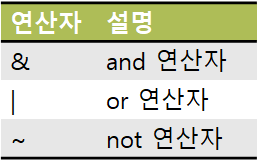

- DataFrame객체[조건], DataFrame객체.loc[조건]
    - 조건이 True인 행만 조회
    - 열까지 선택시
        - DataFrame객체[조건][열]
        - DataFrame객체.loc[조건, 열]
- **iloc[]**은 boolean indexing을 **지원하지 않는다.**

In [302]:
# 국어점수가 70점 이상인 행
grade[grade['국어'] >= 70]   # True 인 행을 조회

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-1,100.0,80,50,80,310.0,77.50,True,합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [314]:
# 국어점수가 70점 이상인 행의 '국어', '평균'
grade[grade['국어'] >= 70][['국어', '평균']]

,국어,평균
ID,,
id-1,100.0,77.50
id-4,90.0,77.50
id-5,85.0,72.75


In [307]:
#  수학이 100점인 행
grade.loc[grade['수학'] == 100]

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [309]:
# grade.iloc[grade['수학'] == 100]

In [312]:
#  수학이 100점인 행의 수학, 평균
grade.loc[grade['수학']==100, ['수학', '평균']]
# loc[행,   열]
# loc[boolean indexing,   열선택]

,수학,평균
ID,,
id-4,100,77.50
id-5,100,72.75


In [320]:
# 수학 100점이고 과학은 60점 이상 (둘다 True 행을 조회 => and)
grade[(grade['수학'] == 100) & (grade['과학'] >= 60)]

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-4,90.0,100,50,70,310.0,77.5,True,합격,100,90


In [322]:
# 수학이 100점 또는 pass2 불합격(pass=False) (둘중에 하나이상이 True) 
grade.loc[(grade['수학'] == 100)  | (grade['pass2'] == '불합격')]

,국어,수학,영어,과학,점수 합계,평균,pass,pass2,국어2,수학II
ID,,,,,,,,,,
id-2,50.0,50,50,90,240.0,60.00,False,불합격,100,90
id-3,NaN,90,50,100,NaN,NaN,False,불합격,100,90
id-4,90.0,100,50,70,310.0,77.50,True,합격,100,90
id-5,85.0,100,50,56,291.0,72.75,False,불합격,100,90


In [ ]:
# loc, iloc [행, 열]

# [열] (x)

In [327]:
# 수학이 100점이 아닌 행
grade.loc[~(grade['수학'] == 100), '수학']

ID
id-1    80
id-2    50
id-3    90
Name: 수학, dtype: int64

In [335]:
grade[~(grade['수학'] == 100)][['수학', '국어']]

,수학,국어
ID,,
id-1,80,100.0
id-2,50,50.0
id-3,90,NaN


## TODO

In [101]:
#TODO:  상영시간 (duration)이 300 이상인 영화들 조회

df.loc[df['duration']>=300]


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1134,Color,Michael Cimino,102.0,325.0,517.0,678.0,Sam Waterston,12000.0,1500000.0,Adventure|Drama|Western,...,189.0,English,USA,R,44000000.0,1980.0,849.0,6.8,2.35,1000
1487,Color,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Crime|Drama,...,129.0,English,USA,R,35000000.0,1993.0,674.0,8.0,1.66,6000
1694,Color,NaN,16.0,511.0,NaN,51.0,Ingvar Eggert Sigurðsson,147.0,NaN,Crime|Drama|Thriller,...,19.0,Icelandic,Iceland,NaN,NaN,NaN,63.0,8.2,16.00,0
2436,Color,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,...,36.0,English,France,Not Rated,NaN,NaN,30.0,7.7,2.35,0
3254,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,...,47.0,Thai,Thailand,R,400000000.0,2001.0,6.0,6.6,1.85,124


In [102]:
#TODO:  상영시간 (duration)이 300 이상인 영화들의 영화제목(movie_title)과 감독이름(director_name) 조회
df.loc[df['duration']>=300 , ['movie_title','director_name','duration']]

,movie_title,director_name,duration
1134,Heaven's Gate,Michael Cimino,325.0
1487,"Blood In, Blood Out",Taylor Hackford,330.0
1694,Trapped,NaN,511.0
2436,Carlos,NaN,334.0
3254,The Legend of Suriyothai,Chatrichalerm Yukol,300.0


In [103]:
#TODO:  감독이름(director_name)이 'Quentin Tarantino' 의 영화들만 조회
df[df['director_name'] == 'Quentin Tarantino']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
293,Color,Quentin Tarantino,765.0,165.0,16000.0,265.0,Christoph Waltz,29000.0,162804648.0,Drama|Western,...,1193.0,English,USA,R,100000000.0,2012.0,11000.0,8.5,2.35,199000
582,Color,Quentin Tarantino,486.0,153.0,16000.0,11000.0,Brad Pitt,13000.0,120523073.0,Adventure|Drama|War,...,1527.0,English,USA,R,75000000.0,2009.0,11000.0,8.3,2.35,42000
698,Color,Quentin Tarantino,596.0,187.0,16000.0,1000.0,Jennifer Jason Leigh,46000.0,54116191.0,Crime|Drama|Mystery|Thriller|Western,...,1018.0,English,USA,R,44000000.0,2015.0,1000.0,7.9,2.76,114000
846,Black and White,Quentin Tarantino,354.0,111.0,16000.0,640.0,Vivica A. Fox,926.0,70098138.0,Action,...,2105.0,English,USA,R,30000000.0,2003.0,890.0,8.1,2.35,13000
849,Black and White,Quentin Tarantino,304.0,137.0,16000.0,348.0,Michael Parks,890.0,66207920.0,Action|Crime|Drama|Thriller,...,935.0,English,USA,R,30000000.0,2004.0,387.0,8.0,2.35,0
2883,Color,Quentin Tarantino,140.0,154.0,16000.0,889.0,Sid Haig,22000.0,39647595.0,Crime|Thriller,...,462.0,English,USA,R,12000000.0,1997.0,1000.0,7.5,1.85,0
3295,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Crime|Drama,...,2195.0,English,USA,R,8000000.0,1994.0,902.0,8.9,2.35,45000
4395,Color,Quentin Tarantino,173.0,99.0,16000.0,455.0,Steve Buscemi,16000.0,2812029.0,Crime|Drama|Thriller,...,931.0,English,USA,R,1200000.0,1992.0,12000.0,8.4,2.35,19000


In [107]:
# TODO: James Cameron의 영화중 상영시간이 150분 이상인 영화들의 제목(movie_title), 상영시간(durations), 컬러여부(color) 조회
df.loc[(df['director_name'] == 'James Cameron') & (df['duration']>=150),['movie_title','duration','color']]

,movie_title,duration,color
0,Avatar,178.0,Color
26,Titanic,194.0,Color
285,Terminator 2: Judgment Day,153.0,Color
599,The Abyss,171.0,Color
2455,Aliens,154.0,Color


## query() 를 이용한 boolean indexing
- query(조회조건)
    - sql의 where 절의 조건 처럼 문자열의 query statement를 이용해 조건으로 조회
    - boolean index에 비해 
        - 장점: 편의성(문자열로 query statement를 만들므로 동적 구문 생성등 다양한 처리가 가능)과 가독성이 좋다.
        - 단점: 속도가 느리다.
- 조회조건 구문
    - `"컬럼명 연산자 비교값"`
- 외부변수를 이용해 query문의 비교값을 지정할 수 있다.
    - query 문자열 안에서 @변수명 사용
    - f string이나 format() 함수를 이용해 query를 만든다.

### 연산자 
- **비교 연산자**
    - ==, \>, \>=, \<, \<=, !=
- **결측치 비교**
    - 컬럼.isna(), isnull()
    - 컬럼.notna(), notnull()       
- **논리 연산자**
    - and, or, not
- **in 연산자**
    - in, ==
    - not in, !=
    - 비교 대상값은 리스트에 넣는다.
- **Index name으로 검색**
    - 행 이름으로 검색
- **문자열 부분검색(sql의 like)**
    - 컬럼명.str.contains(문자열): 문자열을 포함하고 있는 
    - 컬럼명.str.startswith(문자열): 문자열로 시작하는
    - 컬럼명.str.endswith(문자열): 문자열로 끝나는
    - **문자열 부분검색을 할 컬럼에 결측치(NaN)이 있으면 안된다.**


In [114]:
data_dict = {
    'name':['김영수','박영희','홍길동','김영수','이순신','박영희','강감찬'],
    'age':[23,17,31,28,40,35,27],
    'tall':[181.3,178.2,162.3,None,201.2,171.2,169.3]
}
df = pd.DataFrame(data_dict)
df

,name,age,tall
0,김영수,23,181.3
1,박영희,17,178.2
2,홍길동,31,162.3
3,김영수,28,NaN
4,이순신,40,201.2
5,박영희,35,171.2
6,강감찬,27,169.3


In [115]:
#비교연산
#df[df['age'] == 31]
df.query("age==31")

,name,age,tall
2,홍길동,31,162.3


In [116]:
df.query('tall >= 170')

,name,age,tall
0,김영수,23,181.3
1,박영희,17,178.2
4,이순신,40,201.2
5,박영희,35,171.2


In [119]:
#결측치 조회 - Series함수사용.
df.query("tall.isnull()")
df.query("tall.isna()")

,name,age,tall
3,김영수,28,NaN


In [120]:
df.query("tall.notnull()")
df.query("tall.notna()")

,name,age,tall
0,김영수,23,181.3
1,박영희,17,178.2
2,홍길동,31,162.3
4,이순신,40,201.2
5,박영희,35,171.2
6,강감찬,27,169.3


In [121]:
#논리연산
#df[(df['age'] > 20) & (df['tall'] > 180)]
df.query("age > 20 and tall > 180")
df.query("age > 20 & tall > 180")

,name,age,tall
0,김영수,23,181.3
4,이순신,40,201.2


In [123]:
df.query("age>30 or tall > 190")
df.query("age>30 | tall > 190")

,name,age,tall
2,홍길동,31,162.3
4,이순신,40,201.2
5,박영희,35,171.2


In [125]:
df.query("name == '김영수'")

,name,age,tall
0,김영수,23,181.3
3,김영수,28,NaN


In [126]:
# 외부변수에 값을 query 구문에서 사용
name = '김영수'
df.query('name == @name') #name 변수의 값을 설정, 값이 문자열이면 '' 처리를 알아서 해준다.

,name,age,tall
0,김영수,23,181.3
3,김영수,28,NaN


In [130]:
df.query(f"name == '{name}'")

,name,age,tall
0,김영수,23,181.3
3,김영수,28,NaN


In [134]:
#in
#df.query("name == '홍길동' or name == '이순신'")
df.query("name in ['홍길동','이순신','강감찬']")
df.query("name == ['홍길동','이순신','강감찬']")

,name,age,tall
2,홍길동,31,162.3
4,이순신,40,201.2
6,강감찬,27,169.3


In [135]:
#not in
#df.query("name not in ['홍길동','이순신','강감찬']")
df.query("name != ['홍길동','이순신','강감찬']")

,name,age,tall
0,김영수,23,181.3
1,박영희,17,178.2
3,김영수,28,NaN
5,박영희,35,171.2


In [137]:
#특정 문자열로 끝나는
df.query('name.str.endswith("길동")')

,name,age,tall
2,홍길동,31,162.3


In [139]:
#특정 문자열을 포함하는
df.query('name.str.contains("영")')

,name,age,tall
0,김영수,23,181.3
1,박영희,17,178.2
3,김영수,28,NaN
5,박영희,35,171.2


In [140]:
#index명으로 조회
df

,name,age,tall
0,김영수,23,181.3
1,박영희,17,178.2
2,홍길동,31,162.3
3,김영수,28,NaN
4,이순신,40,201.2
5,박영희,35,171.2
6,강감찬,27,169.3


### TODO

In [141]:
# 상영시간이 300분 이상인 영화들만 조회
# movie_df[movie_df['duration'] > = 300]
movie_df.query('duration >= 300')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1134,Color,Michael Cimino,102.0,325.0,517.0,678.0,Sam Waterston,12000.0,1500000.0,Adventure|Drama|Western,...,189.0,English,USA,R,44000000.0,1980.0,849.0,6.8,2.35,1000
1487,Color,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Crime|Drama,...,129.0,English,USA,R,35000000.0,1993.0,674.0,8.0,1.66,6000
1694,Color,NaN,16.0,511.0,NaN,51.0,Ingvar Eggert Sigurðsson,147.0,NaN,Crime|Drama|Thriller,...,19.0,Icelandic,Iceland,NaN,NaN,NaN,63.0,8.2,16.00,0
2436,Color,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,...,36.0,English,France,Not Rated,NaN,NaN,30.0,7.7,2.35,0
3254,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,...,47.0,Thai,Thailand,R,400000000.0,2001.0,6.0,6.6,1.85,124


In [143]:
# 상영시간이 250분 ~ 300분 인 영화들 조회
movie_df.query('duration>=250 and duration <= 300')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
874,Color,Ron Maxwell,84.0,280.0,33.0,67.0,Bruce Boxleitner,789.0,12870569.0,Drama|History|War,...,497.0,English,USA,PG-13,56000000.0,2003.0,640.0,6.3,2.35,953
1150,Color,Joseph L. Mankiewicz,72.0,251.0,311.0,595.0,Richard Burton,940.0,57750000.0,Biography|Drama|History|Romance,...,192.0,English,UK,Approved,31115000.0,1963.0,726.0,7.0,2.20,0
1556,Color,Francis Ford Coppola,261.0,289.0,0.0,3000.0,Marlon Brando,11000.0,78800000.0,Drama|War,...,983.0,English,USA,R,31500000.0,1979.0,10000.0,8.5,2.35,19000
1698,Color,Sergio Leone,111.0,251.0,0.0,642.0,Burt Young,22000.0,5300000.0,Crime|Drama,...,495.0,English,Italy,R,30000000.0,1984.0,683.0,8.4,1.85,12000
1963,Color,Ron Maxwell,22.0,271.0,33.0,251.0,William Morgan Sheppard,854.0,10769960.0,Drama|History|War,...,256.0,English,USA,PG,25000000.0,1993.0,702.0,7.7,1.85,0
2527,Color,Peter Flinth,34.0,270.0,5.0,292.0,Michael Nyqvist,908.0,NaN,Action|Adventure|Drama|Romance|War,...,54.0,Swedish,Sweden,NaN,25000000.0,2007.0,690.0,6.6,2.35,0
2687,Color,NaN,9.0,286.0,NaN,527.0,Tom Hollander,857.0,NaN,Drama|History|Thriller,...,39.0,English,USA,NaN,NaN,NaN,555.0,7.9,1.78,733
2922,Color,Wolfgang Petersen,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11433134.0,Adventure|Drama|Thriller|War,...,426.0,German,West Germany,R,14000000.0,1981.0,21.0,8.4,1.85,11000
3254,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,...,47.0,Thai,Thailand,R,400000000.0,2001.0,6.0,6.6,1.85,124


In [144]:
# 컬러영화가 아닌 영화 조회
movie_df.query('color !="Color"')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
111,Black and White,Michael Bay,191.0,184.0,0.0,691.0,Jaime King,3000.0,198539855.0,Action|Drama|History|Romance|War,...,1999.0,English,USA,PG-13,140000000.0,2001.0,961.0,6.1,2.35,0
148,Black and White,Lee Tamahori,264.0,133.0,93.0,746.0,Colin Salmon,769.0,160201106.0,Action|Adventure|Thriller,...,1185.0,English,UK,PG-13,142000000.0,2002.0,766.0,6.1,2.35,0
254,Black and White,Martin Scorsese,267.0,170.0,17000.0,827.0,Adam Scott,29000.0,102608827.0,Biography|Drama,...,799.0,English,USA,PG-13,110000000.0,2004.0,3000.0,7.5,2.35,0
269,Black and White,Michael Mann,174.0,165.0,0.0,780.0,Jada Pinkett Smith,10000.0,58183966.0,Biography|Drama|Sport,...,386.0,English,USA,R,107000000.0,2001.0,851.0,6.8,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4882,Black and White,Kevin Smith,136.0,102.0,0.0,216.0,Brian O'Halloran,898.0,3151130.0,Comedy,...,615.0,English,USA,R,230000.0,1994.0,657.0,7.8,1.37,0
4888,Black and White,Richard Linklater,61.0,100.0,0.0,0.0,Richard Linklater,5.0,1227508.0,Comedy|Drama,...,80.0,English,USA,R,23000.0,1991.0,0.0,7.1,1.37,2000
4893,NaN,Brandon Landers,NaN,143.0,8.0,8.0,Alana Kaniewski,720.0,NaN,Drama|Horror|Thriller,...,8.0,English,USA,NaN,17350.0,2011.0,19.0,3.0,NaN,33
4895,Black and White,Jim Chuchu,6.0,60.0,0.0,4.0,Olwenya Maina,147.0,NaN,Drama,...,1.0,Swahili,Kenya,NaN,15000.0,2014.0,19.0,7.4,NaN,45


In [146]:
# 이름에 James가 들어가는 감독의 영화조회
# 문자열 컬럼(director_name)에 결측치가 있을 경우 부분일치 조회가 안됨. => 결측치가 아닌 행 조회 연산을 같이 해야 한다.
movie_df.query('director_name.notnull() and director_name.str.contains("James")')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
45,Color,James Wan,424.0,140.0,0.0,14000.0,Paul Walker,26000.0,350034110.0,Action|Crime|Thriller,...,657.0,English,USA,PG-13,190000000.0,2015.0,23000.0,7.2,2.35,94000
95,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
106,Color,James Bobin,218.0,113.0,33.0,11000.0,Alan Rickman,40000.0,76846624.0,Adventure|Family|Fantasy,...,131.0,English,USA,PG,170000000.0,2016.0,25000.0,6.4,1.85,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,Color,James Algar,116.0,70.0,11.0,8.0,Donnie Dunagan,16.0,102797150.0,Animation|Drama|Family,...,136.0,English,USA,Approved,NaN,1942.0,12.0,7.4,1.33,0
4578,Color,Steve James,53.0,170.0,23.0,2.0,Arthur Agee,7.0,7830611.0,Documentary|Drama|Sport,...,74.0,English,USA,PG-13,700000.0,1994.0,6.0,8.3,1.33,0
4771,Color,James O'Brien,5.0,105.0,7.0,494.0,Vivian Lamolli,814.0,NaN,Adventure|Drama|Fantasy|Thriller|Western,...,4.0,English,USA,NaN,250000.0,2015.0,755.0,4.0,NaN,244
4797,Black and White,James Kerwin,25.0,89.0,0.0,31.0,Chase Masterson,236.0,NaN,Drama|Music|Mystery|Romance|Sci-Fi,...,10.0,English,USA,PG,2500000.0,2008.0,189.0,5.4,1.78,83
